This plots ROI values extracted from images that have been normalized using DARTEL, 
but the values have been extracted from ROI derived from a prior analysis done using images normalized using DARTEL.

In [59]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

{1: 'left_occip', 2: 'left_temporal', 3: 'left_temporal2', 4: 'right_perihorn', 5: 'left_occip2', 6: 'left_perihorn', 7: 'left_wm', 8: 'right_occip', 9: 'right_temporal', 10: 'left_insula'}
using default groups
Standard deviation of label left_occip: 7.23065519381e-05
Model used for correction: roi ~ 1 + C(apo) + gender + educyears + ventricles
Standard deviation after correction for covariates: 7.09479240285e-05
Region: left_occip - Fitting order: 1 - Formula: roi ~ 1 + age
Standard deviation of label left_temporal: 7.80915181739e-05
Model used for correction: roi ~ 1 + C(apo) + gender + educyears + ventricles
Standard deviation after correction for covariates: 7.65422086817e-05
Region: left_temporal - Fitting order: 1 - Formula: roi ~ 1 + age
Standard deviation of label right_perihorn: 7.60303042271e-05
Model used for correction: roi ~ 1 + C(apo) + gender + educyears + ventricles
Standard deviation after correction for covariates: 7.46169133886e-05
Region: right_perihorn - Fitting or

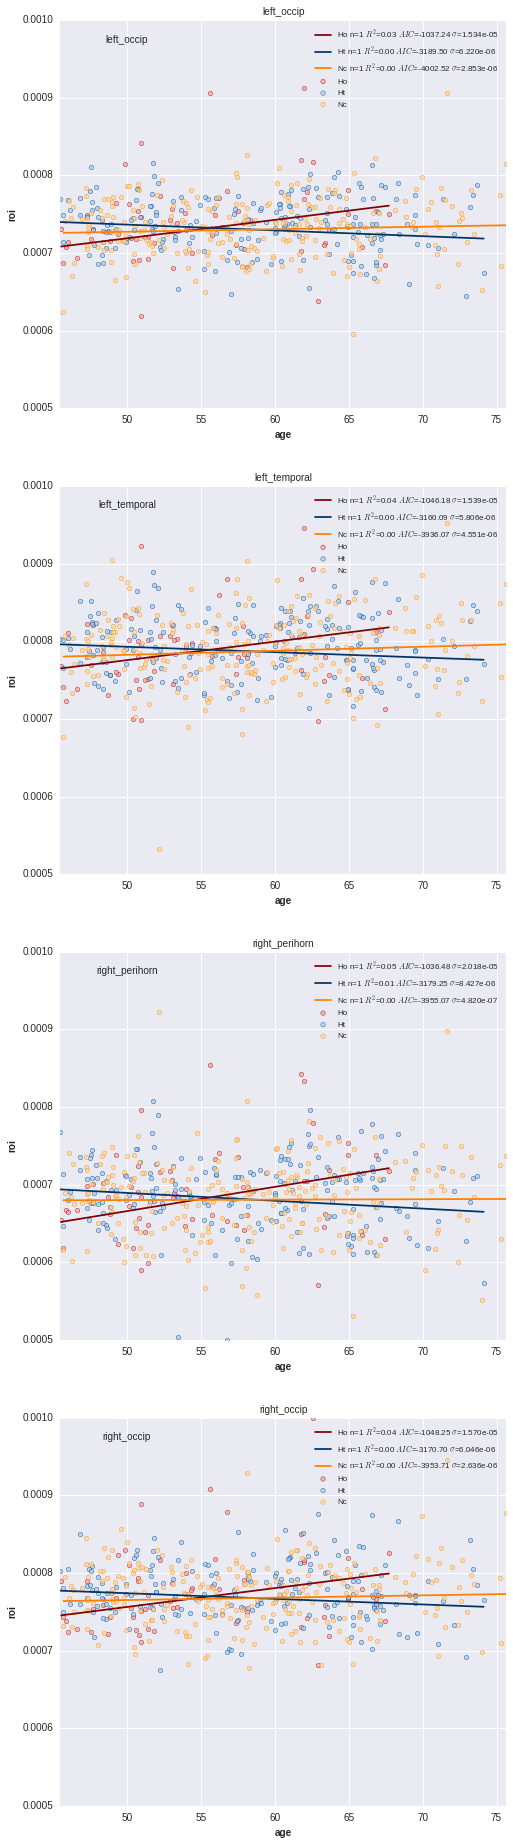

In [60]:
regions = [1,2,4,8]
data = pd.read_excel('/tmp/covariates.xls')
data['subject'] = data.index
data = data.sort_values(['apo', 'subject'])
src = '/home/grg/spm/ROIapoE/ROI_DARTEL/roivalues_csf0/'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]
plot_regions(data, regions, csvfiles, subjects)
#src='/home/grg/spm/ROIapoE/ROI_DARTEL/roivalues_csf0/'
#subjects = [string.atoi(osp.split(e)[-1].split('_')[0])\
#            for e in glob(osp.join(src, '*.csv'))]
#roivalues = collect_roivalues(1, src, subjects)#, subjects=subjects)


In [55]:
roivalues = collect_roivalues(1, csvfiles, subjects, verbose=False)
roivalues.head()

,roi
44229,0.000696
10367,0.000743
55636,0.000772
21073,0.000733
12711,0.000720


In [54]:
import plotly
#plotly.init_notebook_mode()

def plotly_region(roilabel):
    to_remove = [55166, 66159, 77068, 10182, 13059, 66019, 66264, 77024, 77263,
            10846, 66026, 66039, 66131, 66368, 77027, 77047]
    data = collect_data()
    roivalues = collect_roivalues(roilabel)
    #data = data[data['apo']==0]
    df = data.join(roivalues)
    df['subject'] = df.index
    df = df.drop(to_remove)
    
    
    import plotly.plotly as py
    import plotly.graph_objs as go

    #data = [trace]

    # Plot and embed in ipython notebook!
    #

    trace = go.Scatter3d(
        x = df['age'],
        y = df['roi'],
        z = df['ventricles'],
        marker=dict(
            size='4',
            color = df['apo'], #set color equal to a variable
            colorscale='Jet',
            showscale=True),
        text = df['subject'],
        mode = 'markers'
    )

    data = [trace]

    # Plot and embed in ipython notebook!
    py.iplot(data)
    # or plot with: plot_url = py.plot(data, filename='basic-line')

In [55]:
df2[df2['ventricles']>30].drop([55166])

NameError: name 'df2' is not defined

In [115]:
data = collect_data()
roivalues = collect_roivalues(roilabel)
#data = data[data['apo']==0]
df = data.join(roivalues)
df['subject'] = df.index


import plotly.plotly as py
import plotly.graph_objs as go

#data = [trace]

# Plot and embed in ipython notebook!
#

trace = go.Scatter(
    x = df['age'],
    y = df['ventricles'],
    
    marker=dict(
        size='4',
        color = df['gender'], #set color equal to a variable
        colorscale='Jet',
        showscale=True),
    text = df['subject'],
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data)

514
KeyError: skipped subject 10070 label 37
KeyError: skipped subject 10102 label 37
KeyError: skipped subject 10108 label 37
KeyError: skipped subject 10235 label 37
KeyError: skipped subject 10365 label 37
KeyError: skipped subject 10419 label 37
KeyError: skipped subject 10463 label 37
KeyError: skipped subject 10530 label 37
KeyError: skipped subject 10551 label 37
KeyError: skipped subject 10563 label 37
KeyError: skipped subject 10576 label 37
KeyError: skipped subject 10630 label 37
KeyError: skipped subject 10668 label 37
KeyError: skipped subject 10692 label 37
KeyError: skipped subject 10693 label 37
KeyError: skipped subject 10703 label 37
KeyError: skipped subject 10725 label 37
KeyError: skipped subject 10737 label 37
KeyError: skipped subject 10756 label 37
KeyError: skipped subject 10809 label 37
KeyError: skipped subject 11045 label 37
KeyError: skipped subject 11047 label 37
KeyError: skipped subject 11048 label 37
KeyError: skipped subject 11133 label 37
KeyError: sk

In [269]:
order = 1
for i in range(1, 9):
    roivalues = collect_roivalues(i)
    df = data.join(roivalues)
    ycorr = pd.DataFrame(correct(df), columns=['roi'])
    df = data.join(ycorr)
    df['subject'] = df.index
    df = df.sort_values(['apo', 'subject']).dropna()
    formulas = ['roi ~ 1 + age'] #, 
    #        'roi ~ 1 + age + I(age**2)', 
    #        'roi ~ 1 + age + I(age**2) + I(age**3)']

    poly = ols(formula=formulas[0], data=df).fit()
    print poly.summary()
    
    break

                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.929
Date:                Wed, 01 Feb 2017   Prob (F-statistic):             0.0152
Time:                        18:22:24   Log-Likelihood:                 4294.9
No. Observations:                 498   AIC:                            -8586.
Df Residuals:                     496   BIC:                            -8577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0008   1.56e-05     49.838      0.0